# Exploratory Data Analysis (EDA): "bank_dataset.csv"

# 1 - Importación de Librerías

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

# 2 - Carga del dataset "raw" desde github

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/ITACADEMYprojectes/projecteML/e8d1aab0a24ddf55af9dfd9e83b1ea79e34c1af9/bank_dataset.CSV')

# 3 -  Exploración del dataset

## Información general del dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


## Visualización primeras filas

In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# 4 - Descripción estadística del dataset


## Estadísticas descriptivas para variables numéricas

In [56]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Histograma de cada variable numérica

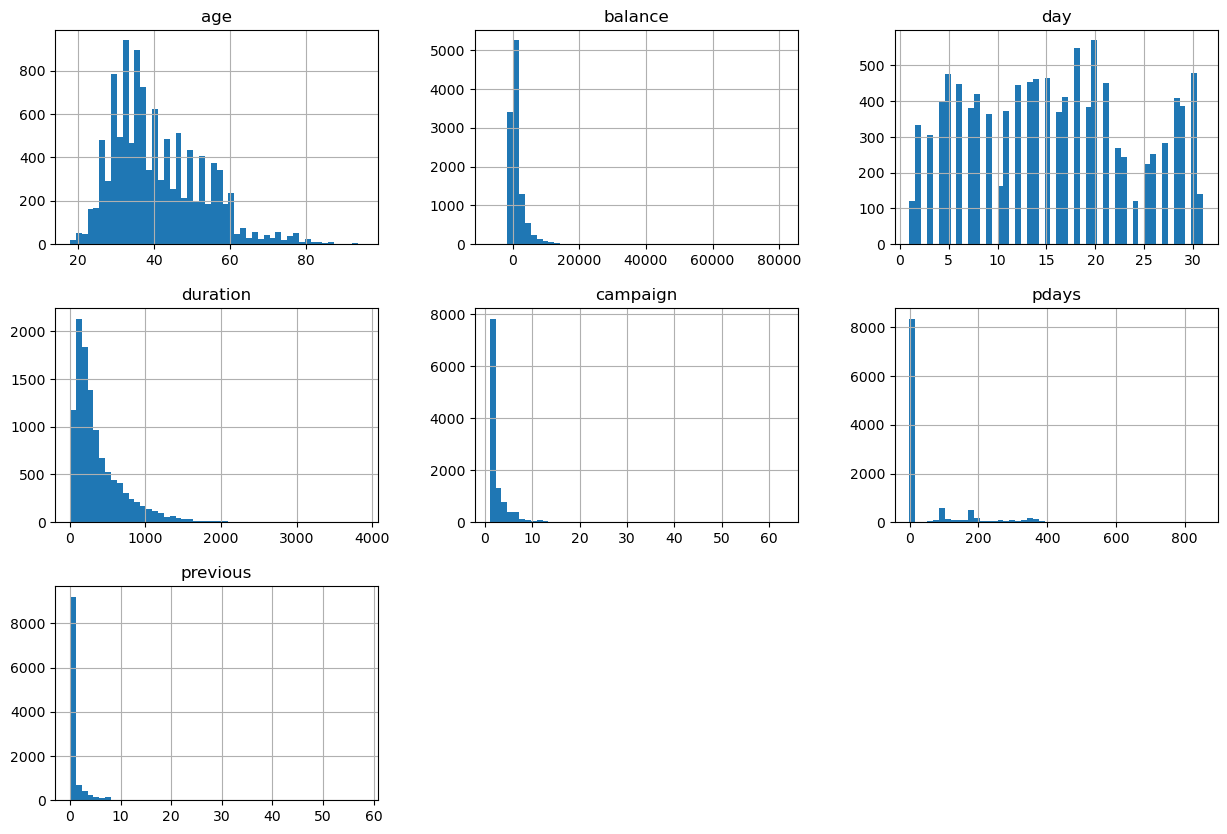

In [57]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

## Estadísticas descriptivas para variables categóricas

In [58]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11157,11155,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6349,5474,10994,5881,9702,8042,2824,8326,5873


## Recuento de los valores de cada variable categórica

In [59]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
married     6349
single      3517
divorced    1291
Name: marital, dtype: int64
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: education, dtype: int64
no     10994
yes      168
Name: default, dtype: int64
no     5881
yes    5281
Name: housing, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64
no     5873
yes    5289
Name: d

### Comentarios:

El conjunto de datos tiene 17 columnas, 11162 registros y contiene información sobre diversas características relacionadas con interacciones bancarias, que incluyen tanto variables numéricas como categóricas. 

Para las variables númericas se incluyó un análisis descriptivo evaluando medidas de tendencia central (media, mediana) y dispersión (desviación estándar) además de histogramas. De un primer análisis se destaca que la variable "balance" tiene la mayor desviación estandar del conjunto indicando una dispersión significativa. También que las distribuciones son heterogéneas, con algunas variables altamente concentradas como "campaign", "previous" y otras más dispersas como "balance" o "duration".

Para las variables categóricas también se detalla las frecuencias y distribución de los datos. De un primer análisis se destaca que variables como "job", "education", y "poutcome" tienen categorías "unknown", indicando posibles datos nulos, así como que hay un fuerte desbalance en variables como "default" y "loan". 

# 5 - Gestión valores nulos

## Recuento valores nulos por columna

In [60]:
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

## Visualización de valores nulos

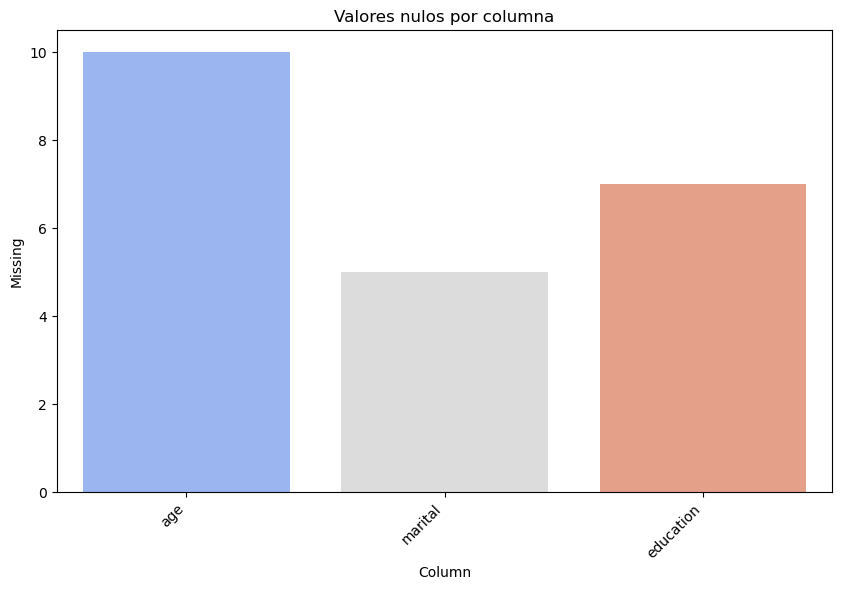

In [61]:
# Como son pocos los valores nulos en un mapa de calor no se visualizan bien, por lo que voy a crear un DataFrame para valores nulos y luego graficarlos
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing']
missing_data = missing_data[missing_data['Missing'] > 0]

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x="Column", y="Missing", data=missing_data, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Valores nulos por columna")
plt.show()

## Imputación de valores a las columnas con nulos

### Para la variable númerica "age" uso la mediana

In [62]:
df['age'] = df['age'].fillna(df['age'].median())

### Para las variables categóricas "marital" y "education" uso la moda, que es el valor que aparece con mayor frecuencia

In [63]:
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

### comprobación

In [64]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Comentarios:

En este dataset los valores nulos son solo 22 en 11162, por lo que utilize la mediana para las variables numéricas y la moda para categóricas que es el valor que aparece con mayor frecuencia.

# 6 - Gestión de valores atípicos (outliers)

## Detección de outliers 

### Detección de outliers con boxplots

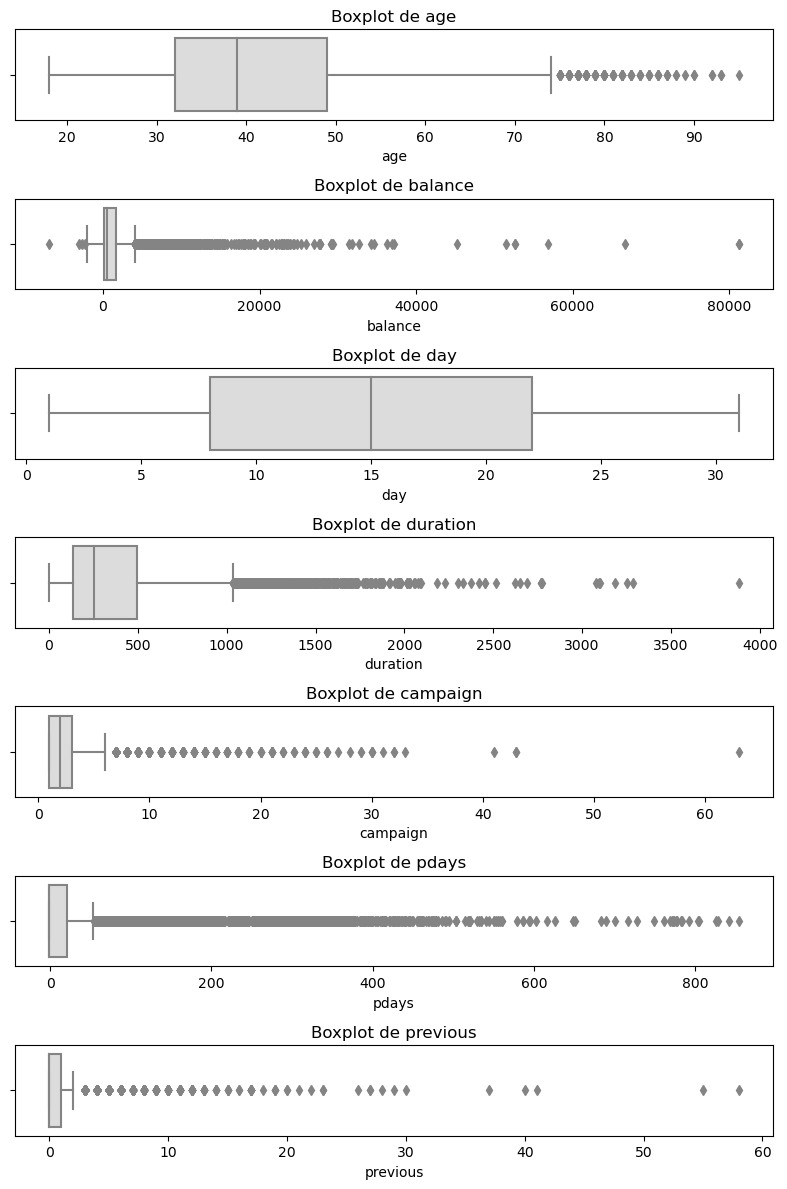

In [65]:
# Creación de subplots para cada variable numérica
columnas_numericas = df.select_dtypes(include=[np.number])
fig, axes = plt.subplots(len(columnas_numericas.columns), 1, figsize=(8, 12))

# Boxplot para cada columna numérica
for i, column in enumerate(columnas_numericas.columns):
    sns.boxplot(data=df, x=column, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

### Detección de outliers con Z-score

In [66]:
from scipy.stats import zscore

# Calculo de Z-scores para variables numéricas
z_scores = pd.DataFrame(zscore(df.select_dtypes(include=[np.number])), 
                        columns=df.select_dtypes(include=[np.number]).columns)

# Visualización de los Z-scores
print(z_scores.head())

        age   balance       day  duration  campaign     pdays  previous
0  1.491834  0.252525 -1.265746  1.930226 -0.554168 -0.481184  -0.36326
1  1.239929 -0.459974 -1.265746  3.154612 -0.554168 -0.481184  -0.36326
2 -0.019597 -0.080160 -1.265746  2.929901 -0.554168 -0.481184  -0.36326
3  1.155960  0.293762 -1.265746  0.596366 -0.554168 -0.481184  -0.36326
4  1.071992 -0.416876 -1.265746  0.867171 -0.186785 -0.481184  -0.36326


In [67]:
# Identificar columnas con outliers según un umbral de 3
outliers_by_column = (z_scores > 3).sum()
print("Cantidad de outliers por columna:")
print(outliers_by_column)

Cantidad de outliers por columna:
age         132
balance     173
day           0
duration    201
campaign    210
pdays       176
previous    220
dtype: int64


## Eliminación de outliers utilizando Z-score

In [68]:
df = df[(z_scores < 3).all(axis=1)]

In [72]:
print(df.head())

print()
print("cantidad de registros luego de la eliminación:", df.shape[0])

    age         job  marital  education default  balance housing loan  \
0  59.0      admin.  married  secondary      no     2343     yes   no   
2  41.0  technician  married  secondary      no     1270     yes   no   
3  55.0    services  married  secondary      no     2476     yes   no   
4  54.0      admin.  married   tertiary      no      184      no   no   
5  42.0  management   single   tertiary      no        0     yes  yes   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
5  unknown    5   may       562         2     -1         0  unknown     yes  

cantidad de registros luego de la eliminación: 10098


### Comentarios:

Se puede comprobar graficamente y atraves del z-score que todas las variables, menos "day" (que al estar acotada a los 30 días del mes tiene sentido), tienen outliers.  

Se decidió eliminar los outliers detectados mediante Z-score (>3). La elección del 3 como umbral proviene de la regla empírica, según la cual los datos dentro de 3 veces la desviación estándar respecto a la media representan el 99.7% de los datos de la distribución. Sabiendo esto, podemos concluir con bastante seguridad que los datos que caen más allá de este umbral son atípicos, pues son distintos al 99.7% de los datos.

Esto redujo el número de registros de 11162 a 10098, (un 10% de datos) pero probablemente aumentó la calidad y la homogeneidad de los datos, en contrapartida a las alternativas de conservación como la imputación o la winsorización.

# 7 - Identificación de características relevantes

In [73]:
# Transformo los valores "yes" a True y "no" a False de las variables "default" (mi variable objetivo), "loan" y "deposit", para que sean booleana y mas fácil de trabajar mas adelante.

df['default'] = df['default'].map({'yes': True, 'no': False})
df['loan'] = df['loan'].map({'yes': True, 'no': False})
df['deposit'] = df['deposit'].map({'yes': True, 'no': False})

print(df['default'].dtype)
print(df['loan'].dtype) 
print(df['deposit'].dtype) 

bool
bool
bool


## Matriz de correlación para variables numéricas

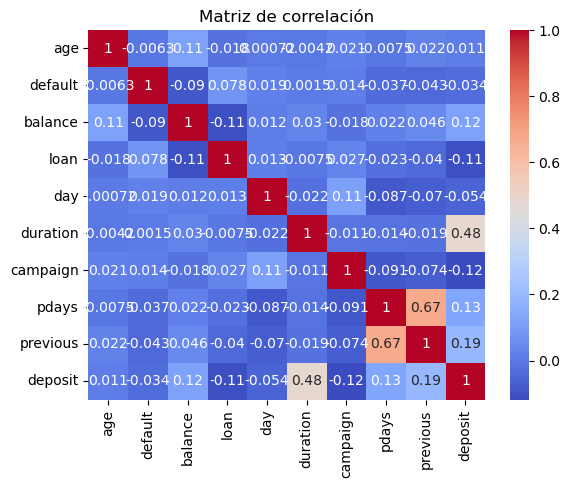

In [74]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

## Análisis de variables categóricas frente a la variable objetivo "default"

In [75]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nDistribución de {col} respecto a la variable objetivo 'default':")
    print(df.groupby(col)['default'].value_counts(normalize=True))


Distribución de job respecto a la variable objetivo 'default':
job            default
admin.         False      0.991756
               True       0.008244
blue-collar    False      0.977998
               True       0.022002
entrepreneur   False      0.967213
               True       0.032787
housemaid      False      0.972973
               True       0.027027
management     False      0.985300
               True       0.014700
retired        False      0.991803
               True       0.008197
self-employed  False      0.977778
               True       0.022222
services       False      0.991736
               True       0.008264
student        False      0.996997
               True       0.003003
technician     False      0.984290
               True       0.015710
unemployed     False      0.978462
               True       0.021538
unknown        False      0.983333
               True       0.016667
Name: default, dtype: float64

Distribución de marital respecto a la vari

## Test de asociación Chi-Cuadrado

In [76]:
#importación de libreria
from scipy.stats import chi2_contingency

# Analisis para con la variable "balance"
# Tabla de contingencia
tabla_contingencia = pd.crosstab(df['default'], df['balance'])

# Prueba de Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Resultados
print("Default y Balance:")
print("Estadístico Chi-Cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

# Interpretación
if p < 0.05:
    print("Existe una relación significativa entre 'default' y 'balance'.")
else:
    print("No existe una relación significativa entre 'default' y 'balance'.")
    
    
# Analisis para con la variable "loan"
# Tabla de contingencia
tabla_contingencia_l = pd.crosstab(df['default'], df['loan'])

# Prueba de Chi-Cuadrado
chi2_l, p_l, dof_l, expected_l = chi2_contingency(tabla_contingencia_l)

# Resultados
print()
print("Default y Loan:")
print("Estadístico Chi-Cuadrado:", chi2_l)
print("Valor p:", p_l)
print("Grados de libertad:", dof_l)
print("Frecuencias esperadas:\n", expected_l)

# Interpretación
if p < 0.05:
    print("Existe una relación significativa entre 'default' y 'loan'.")
else:
    print("No existe una relación significativa entre 'default' y 'loan'.")    
    

Default y Balance:
Estadístico Chi-Cuadrado: 4058.0980345482153
Valor p: 5.798449565641222e-10
Grados de libertad: 3523
Frecuencias esperadas:
 [[0.9845514  0.9845514  0.9845514  ... 0.9845514  3.93820559 0.9845514 ]
 [0.0154486  0.0154486  0.0154486  ... 0.0154486  0.06179441 0.0154486 ]]
Existe una relación significativa entre 'default' y 'balance'.

Default y Loan:
Estadístico Chi-Cuadrado: 59.345039462239406
Valor p: 1.3231329458904692e-14
Grados de libertad: 1
Frecuencias esperadas:
 [[8606.9483066 1335.0516934]
 [ 135.0516934   20.9483066]]
Existe una relación significativa entre 'default' y 'loan'.


### Comentarios:

De la exploración de relaciones visuales entre las variables númericas, y de las variables categóricas con la variable objetivo "default" no se percibe una relación significativa entre las mismas. Sin embargo para complementar el análisis, se analizó si existe relación entre las variables "default" y "balance" y entre "default" y "loan" que son en mi experiencia y por lo que se visulumbra en la matriz de correlacion las que pueden tener mayor relación. Como son todas booleanas se pudo utilizar facilmente la técnica del Chi-cuadrado de lo cual resultó que tanto entre default "default" y "balance" y entre "default" y "loan" existen relaciones significativas.


# 8 - Gestión del desbalance de clases

False    0.984551
True     0.015449
Name: default, dtype: float64


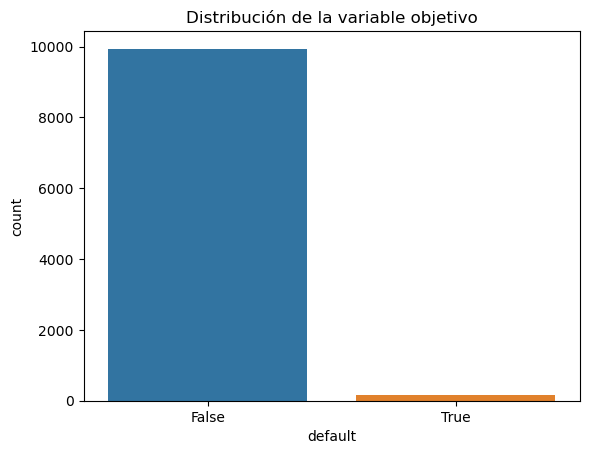

In [77]:
# Distribución de la variable objetivo "default"
print(df['default'].value_counts(normalize=True))

# Visualización de la distribución
sns.countplot(data=df, x='default')
plt.title("Distribución de la variable objetivo")
plt.show()

In [78]:
#Creación de los sets

default_false= df[df['default'] == False]
default_true= df[df['default'] == True]

print(default_false.count())

print(default_true.count())


age          9942
job          9942
marital      9942
education    9942
default      9942
balance      9942
housing      9942
loan         9942
contact      9942
day          9942
month        9942
duration     9942
campaign     9942
pdays        9942
previous     9942
poutcome     9942
deposit      9942
dtype: int64
age          156
job          156
marital      156
education    156
default      156
balance      156
housing      156
loan         156
contact      156
day          156
month        156
duration     156
campaign     156
pdays        156
previous     156
poutcome     156
deposit      156
dtype: int64


In [79]:
# Aplicación de técnica de sobremuestreo:

sobremuestreo_true = default_true.sample(n=9942, replace=True, random_state=0)
print(sobremuestreo_true.count())

age          9942
job          9942
marital      9942
education    9942
default      9942
balance      9942
housing      9942
loan         9942
contact      9942
day          9942
month        9942
duration     9942
campaign     9942
pdays        9942
previous     9942
poutcome     9942
deposit      9942
dtype: int64


In [81]:
# comprobación datasets balanceados

print("Registros False:", default_false.shape[0])

print("Registros True:", sobremuestreo_true.shape[0])

Registros False: 9942
Registros True: 9942


### Comentarios:

Como ya se podría prever en los primeros análisis existe un gran desbalance en la variable "default". Luego de volver a reflexionar sobre el trabajo, dado que la cantidad de "Trues" de la variable "default" en el dataset (156/100098 = 1.5%) es muy pequeña decidí la técnica de sobremuestreo sobre la misma, pasando de 156 a 9942 registros.

# 9 - EDA automático con Sweetviz


In [ ]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

# 10 - Conclusión final

Cómo conclusión se puede decir que no se requirieron muchas modificaciones al dataset

Del análisis inicial se vio que el dataset contenía 17 columnas y 11162 filas (registros). 

Se identificaron 22 valores nulos en 3 columnas y se aplico imputación.

Se detectaron valores atípicos en 6 variables numéricas y fueron gestionados mediante eliminación con el z-score.

Respecto a la relación entre variables, para seguir en sintonía con las tareas anteriores, mantuve la variable objetivo "default" y la convertí junto con otras 2 variables a booleana.

Si bien en primera instancia ninguna variable parecía tener una correlacion fuerte con mi variable objetivo, con el test de chi-cuadrado se pudo comprobar que "balance" y "loan" si tienen una realación significativa con "default". 

Por último detecte un gran desbalance en la variable objetivo, con una proporción del 99% frente al 1% aproximadamente, por lo cual, luego de revisar el ejercicio, aplique la técnica de sobremuestreo para tener dos subsets similares y con mayor cantidad de datos.

Como reflexiones finales, si bien entiendo que se tomaron decisiones técnicas válidas, se podrían probar enfoques alternativos para outliers para optimizar resultados y que si bien la variable objetivo "default" elegida inicialmente no es las mas óptima para este dataset, será interesante seguir trabajando con ella ya que es un dato crucial para cualquier institución crediticia.
